# Sprint ディープラーニングフレームワーク2

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

## 1.このSprintについて

### Sprintの目的
- フレームワークのコードを読めるようにする
- フレームワークを習得し続けられるようになる
- 理論を知っている範囲をフレームワークで動かす

### どのように学ぶか
前半はTensorFlowのExampleを動かします。後半ではKerasのコードを書いていきます。

## 2.公式Example

深層学習フレームワークには公式に様々なモデルのExampleコードが公開されています。

### 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。

以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。

[models/tutorials at master · tensorflow/models](https://www.tensorflow.org/tutorials/)

- 実行したファイル
[image segmentation](https://github.com/satoshi30/diveintocode-ml/blob/master/Sprint/Term2_DeepLearning/Sprint14/segmentation.ipynb)

- ベースとなっているモデル　:  U-net [参考](https://qiita.com/hiro871_/items/871c76bf65b76ebe1dd0)

### 【問題2】（アドバンス課題）様々な手法を実行
TensorFLowやGoogle AI ResearchのGitHubリポジトリには、定番のモデルから最新のモデルまで多様なコードが公開されています。これらから興味あるものを選び実行してください。

なお、これらのコードは初学者向けではないため、巨大なデータセットのダウンロードが必要な場合など、実行が簡単ではないこともあります。そういった場合は、コードリーディングを行ってください。

[models/research at master · tensorflow/models](https://github.com/tensorflow/models/tree/master/research)

[google-research/google-research: Google AI Research](https://github.com/google-research/google-research)

更新日が古いものはPythonやTensorFlowのバージョンが古く、扱いずらい場合があります。新しいものから見ることを推奨します。

## 3.異なるフレームワークへの書き換え

「ディープラーニングフレームワーク1」で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していきます。

- Iris（Iris-versicolorとIris-virginicaのみの2値分類）
- Iris（3種類全ての目的変数を使用して多値分類）
- House Prices
- MNIST

### Kerasへの書き換え
KerasはTensorFLowに含まれるtf.kerasモジュールを使用してください。

KerasにはSequentialモデルかFunctional APIかなど書き方に種類がありますが、これは指定しません。

### 【問題3】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# データセットの読み込み
dataset_path ="/Users/ikeda/Desktop/dive/diveintocode-ml/Downlowd_data/datasets_19_420_Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n_hidden1, activation='relu', input_shape=(n_input, )))
model.add(tf.keras.layers.Dense(units=n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(units=n_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

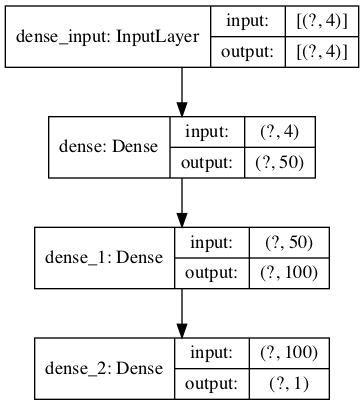

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_data=(X_val, y_val))

Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 - 1s - loss: 0.8499 - accuracy: 0.5000 - val_loss: 0.6495 - val_accuracy: 0.6250
Epoch 2/10
64/64 - 0s - loss: 0.6270 - accuracy: 0.6250 - val_loss: 0.6629 - val_accuracy: 0.3750
Epoch 3/10
64/64 - 0s - loss: 0.5344 - accuracy: 0.8594 - val_loss: 0.4848 - val_accuracy: 0.9375
Epoch 4/10
64/64 - 0s - loss: 0.4704 - accuracy: 0.8438 - val_loss: 0.3865 - val_accuracy: 0.8750
Epoch 5/10
64/64 - 0s - loss: 0.3624 - accuracy: 0.8438 - val_loss: 0.5847 - val_accuracy: 0.5625
Epoch 6/10
64/64 - 0s - loss: 0.3574 - accuracy: 0.8125 - val_loss: 0.4331 - val_accuracy: 0.7500
Epoch 7/10
64/64 - 0s - loss: 0.3822 - accuracy: 0.7656 - val_loss: 0.2466 - val_accuracy: 0.9375
Epoch 8/10
64/64 - 0s - loss: 0.2155 - accuracy: 0.9375 - val_loss: 0.1858 - val_accuracy: 1.0000
Epoch 9/10
64/64 - 0s - loss: 0.1872 - accuracy: 0.9688 - val_loss: 0.1939 - val_accuracy: 0.9375
Epoch 10/10
64/64 - 0s - loss: 0.1686 - accuracy: 0.9062 - val_loss: 0.154

### 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [7]:
# データセットの読み込み
dataset_path ="/Users/ikeda/Desktop/dive/diveintocode-ml/Downlowd_data/datasets_19_420_Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
# one_hotへ変換
y = y.astype(np.int)
y = np.identity(3)[y]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n_hidden1, activation='relu', input_shape=(n_input, )))
model.add(tf.keras.layers.Dense(units=n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(units=n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['categorical_accuracy'])

In [9]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_data=(X_val, y_val))

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 - 1s - loss: 1.1383 - categorical_accuracy: 0.5104 - val_loss: 0.6494 - val_categorical_accuracy: 0.6250
Epoch 2/10
96/96 - 0s - loss: 0.4685 - categorical_accuracy: 0.7396 - val_loss: 0.5537 - val_categorical_accuracy: 0.7083
Epoch 3/10
96/96 - 0s - loss: 0.3417 - categorical_accuracy: 0.8646 - val_loss: 0.3111 - val_categorical_accuracy: 0.9167
Epoch 4/10
96/96 - 0s - loss: 0.2093 - categorical_accuracy: 0.9688 - val_loss: 0.2559 - val_categorical_accuracy: 0.9167
Epoch 5/10
96/96 - 0s - loss: 0.1420 - categorical_accuracy: 0.9479 - val_loss: 0.4905 - val_categorical_accuracy: 0.7500
Epoch 6/10
96/96 - 0s - loss: 0.1708 - categorical_accuracy: 0.9271 - val_loss: 0.2164 - val_categorical_accuracy: 0.8333
Epoch 7/10
96/96 - 0s - loss: 0.1276 - categorical_accuracy: 0.9479 - val_loss: 0.4237 - val_categorical_accuracy: 0.7500
Epoch 8/10
96/96 - 0s - loss: 0.1744 - categorical_accuracy: 0.9271 - val_loss: 0.1863 - val_categoric

### 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [10]:
# データセットの読み込み
dataset_path ="/Users/ikeda/Desktop/dive/diveintocode-ml/Downlowd_data/train.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
objective_variable = 'SalePrice'
features = ['GrLivArea', 'YearBuilt']

y = df[objective_variable]
X = df.loc[:, features]
y = np.array(y)
X = np.array(X)
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Xを標準化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_val = std.transform(X_val)
X_test = std.transform(X_test)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train
n_classes = 1

In [11]:
# 決定係数
def det_coeff(y_true, y_pred):
    u = tf.reduce_sum(tf.square(y_true - y_pred))
    v = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return tf.ones_like(v) - (u / v)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n_hidden1, activation='relu', input_shape=(n_input, )))
model.add(tf.keras.layers.Dense(units=n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(units=n_classes, activation=None))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[det_coeff])
# metrics=['root_mean_squared_error']

In [13]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_data=(X_val, y_val))

Train on 934 samples, validate on 234 samples
Epoch 1/10
934/934 - 1s - loss: 38827281883.8201 - det_coeff: -9.4814e+00 - val_loss: 34994018198.9744 - val_det_coeff: -1.3406e+01
Epoch 2/10
934/934 - 0s - loss: 29377438700.2655 - det_coeff: -6.4400e+00 - val_loss: 15566800567.7949 - val_det_coeff: -5.3569e+00
Epoch 3/10
934/934 - 0s - loss: 7492828620.8822 - det_coeff: -9.9249e-01 - val_loss: 1812857825.9145 - val_det_coeff: -5.0133e-02
Epoch 4/10
934/934 - 0s - loss: 2201119140.7281 - det_coeff: 0.4967 - val_loss: 1524833123.2821 - val_det_coeff: 0.1043
Epoch 5/10
934/934 - 0s - loss: 2067460168.0857 - det_coeff: 0.5118 - val_loss: 1576759852.8547 - val_det_coeff: 0.0587
Epoch 6/10
934/934 - 0s - loss: 2068534473.5246 - det_coeff: 0.5608 - val_loss: 1553682203.8974 - val_det_coeff: 0.0868
Epoch 7/10
934/934 - 0s - loss: 2054300805.1392 - det_coeff: 0.4893 - val_loss: 1495899227.3504 - val_det_coeff: 0.1433
Epoch 8/10
934/934 - 0s - loss: 2035285872.9251 - det_coeff: 0.5601 - val_loss: 

### 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [14]:
# データセットの読み込み
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

# one_hotへ変換
y_test = np.identity(10)[y_test]
y_train = np.identity(10)[y_train]

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 400
n_hidden2 = 200
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n_hidden1, activation='relu', input_shape=(n_input, )))
model.add(tf.keras.layers.Dense(units=n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(units=n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['categorical_accuracy'])

In [16]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 19s - loss: 0.3432 - categorical_accuracy: 0.9072 - val_loss: 0.3947 - val_categorical_accuracy: 0.9053
Epoch 2/20
48000/48000 - 17s - loss: 0.2369 - categorical_accuracy: 0.9395 - val_loss: 0.2170 - val_categorical_accuracy: 0.9412
Epoch 3/20
48000/48000 - 17s - loss: 0.1981 - categorical_accuracy: 0.9499 - val_loss: 0.2205 - val_categorical_accuracy: 0.9465
Epoch 4/20
48000/48000 - 17s - loss: 0.1917 - categorical_accuracy: 0.9536 - val_loss: 0.2210 - val_categorical_accuracy: 0.9473
Epoch 5/20
48000/48000 - 17s - loss: 0.1722 - categorical_accuracy: 0.9566 - val_loss: 0.2282 - val_categorical_accuracy: 0.9455
Epoch 6/20
48000/48000 - 17s - loss: 0.1557 - categorical_accuracy: 0.9621 - val_loss: 0.2195 - val_categorical_accuracy: 0.9535
Epoch 7/20
48000/48000 - 17s - loss: 0.1704 - categorical_accuracy: 0.9603 - val_loss: 0.2717 - val_categorical_accuracy: 0.9528
Epoch 8/20
48000/48000 - 17s - loss: 0.1444 - c

### 【問題7】（アドバンス課題）PyTorchへの書き換え
4種類の問題をPyTorchに書き換えてください。

In [17]:
import torch
torch.__version__

'1.6.0'

In [18]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

#### Iris（2値分類）

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# データセットの読み込み
dataset_path ="/Users/ikeda/Desktop/dive/diveintocode-ml/Downlowd_data/datasets_19_420_Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
# y = y.astype(np.int)[:, np.newaxis]
y = y.astype(np.int)
# one_hotへ変換
# y = y.astype(np.int)
# y = np.identity(2)[y]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 2

In [20]:
# 形を直してバッチ情報を取得
X_train = torch.from_numpy(X_train).float()
X_val = torch.from_numpy(X_val).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_val = torch.from_numpy(y_val).long()
y_test = torch.from_numpy(y_test).long()
ds_train = TensorDataset(X_train, y_train)
loader_train = DataLoader(ds_train, batch_size=batch_size, shuffle=True)

In [21]:
# モデルを構築
model = nn.Sequential()
model.add_module('fc1', nn.Linear(n_input, n_hidden1))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(n_hidden1, n_hidden2))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(n_hidden2, n_classes))
# model.add_module('softmax', nn.Softmax(dim=1))
model

Sequential(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [22]:
# 最適化手法のパラメータ設定
optimizer = optim.SGD(model.parameters(), lr=0.01)
# loss関数の定義
criterion = nn.CrossEntropyLoss()

In [23]:
# バッチ正規化等、学習時と推論時で振る舞いの違うモジュールの振る舞いを学習時の振る舞いに
# model.eval()で推論時の振る舞いに変更可能
model.train()
# 学習ループ
for epoch in tqdm(range(1, num_epochs+1)):
    total_acc = 0
    total_correct = 0
    total_loss = 0
    # ミニバッチ毎ににループ
    for mini_batch_x, mini_batch_y in loader_train:    
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播
        out = model(mini_batch_x)
        # 推論する
        pred = out.data.max(1)[1] # 出力ラベルを求める
        correct = pred.eq(mini_batch_y.data).sum()  # 正解と一緒だったらカウントアップ
        # print(pred, correct)
        total_correct += correct
        # print(total_correct)
        # ロスの計算
        loss = criterion(out, mini_batch_y)
        total_loss += loss
        # print(total_loss)
        # 勾配の計算
        loss.backward()
        # パラメータの更新
        optimizer.step()
    total_loss /= batch_size
    # print(total_loss)
    total_acc = total_correct.numpy() / n_samples
    # print(total_acc)
    val_out = model(X_val)
    val_pred = val_out.data.max(1, keepdim=True)[1] # 出力ラベルを求める
    val_correct = val_pred.eq(y_val.data.view_as(val_pred)).sum()  # 正解と一緒だったらカウントアップ
    val_acc = val_correct.numpy() / len(y_val.data)
    
    val_loss = criterion(val_out, y_val)
    print("Epoch {}, total_loss : {:.4f}, val_loss : {:.4f}, total_acc : {:.3f}, val_acc : {:.3f}".format(epoch, total_loss, val_loss, total_acc, val_acc))

100%|██████████| 10/10 [00:00<00:00, 95.32it/s]

Epoch 1, total_loss : 0.5134, val_loss : 0.7451, total_acc : 0.328, val_acc : 0.375
Epoch 2, total_loss : 0.5000, val_loss : 0.7484, total_acc : 0.391, val_acc : 0.375
Epoch 3, total_loss : 0.4937, val_loss : 0.8357, total_acc : 0.562, val_acc : 0.375
Epoch 4, total_loss : 0.4877, val_loss : 0.7096, total_acc : 0.531, val_acc : 0.375
Epoch 5, total_loss : 0.4749, val_loss : 0.7153, total_acc : 0.562, val_acc : 0.375
Epoch 6, total_loss : 0.4792, val_loss : 0.6879, total_acc : 0.562, val_acc : 0.375
Epoch 7, total_loss : 0.4752, val_loss : 0.6758, total_acc : 0.547, val_acc : 0.438
Epoch 8, total_loss : 0.4558, val_loss : 0.6781, total_acc : 0.547, val_acc : 0.375
Epoch 9, total_loss : 0.4503, val_loss : 0.7378, total_acc : 0.578, val_acc : 0.375
Epoch 10, total_loss : 0.4662, val_loss : 0.6315, total_acc : 0.562, val_acc : 0.875


#### Iris（多値分類）

In [24]:
# データセットの読み込み
dataset_path ="/Users/ikeda/Desktop/dive/diveintocode-ml/Downlowd_data/datasets_19_420_Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
# one_hotへ変換
y = y.astype(np.int)
# y = np.identity(3)[y]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [25]:
# 形を直してバッチ情報を取得
X_train = torch.from_numpy(X_train).float()
X_val = torch.from_numpy(X_val).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_val = torch.from_numpy(y_val).long()
y_test = torch.from_numpy(y_test).long()
ds_train = TensorDataset(X_train, y_train)
loader_train = DataLoader(ds_train, batch_size=batch_size, shuffle=True)

In [26]:
# モデルを構築
model = nn.Sequential()
model.add_module('fc1', nn.Linear(n_input, n_hidden1))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(n_hidden1, n_hidden2))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(n_hidden2, n_classes))
# model.add_module('softmax', nn.Softmax(dim=1))
model

Sequential(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)

In [27]:
# 最適化手法のパラメータ設定
optimizer = optim.SGD(model.parameters(), lr=0.01)
# loss関数の定義
criterion = nn.CrossEntropyLoss()

In [28]:
# バッチ正規化等、学習時と推論時で振る舞いの違うモジュールの振る舞いを学習時の振る舞いに
# model.eval()で推論時の振る舞いに変更可能
model.train()
# 学習ループ
for epoch in tqdm(range(1, num_epochs+1)):
    total_acc = 0
    total_correct = 0
    total_loss = 0
    # ミニバッチ毎ににループ
    for mini_batch_x, mini_batch_y in loader_train:    
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播
        out = model(mini_batch_x)
        # 推論する
        pred = out.data.max(1)[1] # 出力ラベルを求める
        correct = pred.eq(mini_batch_y.data).sum()  # 正解と一緒だったらカウントアップ
        # print(pred, correct)
        total_correct += correct
        # print(total_correct)
        # ロスの計算
        loss = criterion(out, mini_batch_y)
        total_loss += loss
        # print(total_loss)
        # 勾配の計算
        loss.backward()
        # パラメータの更新
        optimizer.step()
    total_loss /= batch_size
    # print(total_loss)
    total_acc = total_correct.numpy() / n_samples
    # print(total_acc)
    val_out = model(X_val)
    val_pred = val_out.data.max(1, keepdim=True)[1] # 出力ラベルを求める
    val_correct = val_pred.eq(y_val.data.view_as(val_pred)).sum()  # 正解と一緒だったらカウントアップ
    val_acc = val_correct.numpy() / len(y_val.data)
    
    val_loss = criterion(val_out, y_val)
    print("Epoch {}, total_loss : {:.4f}, val_loss : {:.4f}, total_acc : {:.3f}, val_acc : {:.3f}".format(epoch, total_loss, val_loss, total_acc, val_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1, total_loss : 1.0747, val_loss : 0.9629, total_acc : 0.323, val_acc : 0.708
Epoch 2, total_loss : 0.9345, val_loss : 0.8792, total_acc : 0.667, val_acc : 0.708
Epoch 3, total_loss : 0.8560, val_loss : 0.8118, total_acc : 0.688, val_acc : 0.708
Epoch 4, total_loss : 0.7930, val_loss : 0.7471, total_acc : 0.688, val_acc : 0.708


100%|██████████| 10/10 [00:00<00:00, 85.34it/s]

Epoch 5, total_loss : 0.7210, val_loss : 0.6952, total_acc : 0.771, val_acc : 0.708
Epoch 6, total_loss : 0.6774, val_loss : 0.6443, total_acc : 0.688, val_acc : 0.708
Epoch 7, total_loss : 0.6282, val_loss : 0.5983, total_acc : 0.740, val_acc : 0.708
Epoch 8, total_loss : 0.5849, val_loss : 0.5635, total_acc : 0.844, val_acc : 0.708
Epoch 9, total_loss : 0.5556, val_loss : 0.5533, total_acc : 0.760, val_acc : 0.875
Epoch 10, total_loss : 0.5232, val_loss : 0.5175, total_acc : 0.844, val_acc : 0.708


#### House Prices

In [29]:
# データセットの読み込み
dataset_path ="/Users/ikeda/Desktop/dive/diveintocode-ml/Downlowd_data/train.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
objective_variable = 'SalePrice'
features = ['GrLivArea', 'YearBuilt']

y = df[objective_variable]
X = df.loc[:, features]
y = np.array(y)
X = np.array(X)
# yを対数変換
y = np.log(y.astype(np.int))[:, np.newaxis]
# y = y.astype(np.int)[:, np.newaxis]
# y = y.astype(np.int)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Xを標準化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_val = std.transform(X_val)
X_test = std.transform(X_test)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train
n_classes = 1

In [30]:
# 形を直してバッチ情報を取得
X_train = torch.from_numpy(X_train).float()
X_val = torch.from_numpy(X_val).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_val = torch.from_numpy(y_val).float()
y_test = torch.from_numpy(y_test).float()
# y_train = torch.from_numpy(y_train).long()
# y_val = torch.from_numpy(y_val).long()
# y_test = torch.from_numpy(y_test).long()
ds_train = TensorDataset(X_train, y_train)
loader_train = DataLoader(ds_train, batch_size=batch_size, shuffle=True)

In [31]:
# モデルを構築
model = nn.Sequential()
model.add_module('fc1', nn.Linear(n_input, n_hidden1))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(n_hidden1, n_hidden2))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(n_hidden2, n_classes))
# model.add_module('softmax', nn.Softmax(dim=1))
model

Sequential(
  (fc1): Linear(in_features=2, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)

In [32]:
# 最適化手法のパラメータ設定
optimizer = optim.SGD(model.parameters(), lr=0.01)
# loss関数の定義
criterion = nn.MSELoss()

In [33]:
# バッチ正規化等、学習時と推論時で振る舞いの違うモジュールの振る舞いを学習時の振る舞いに
# model.eval()で推論時の振る舞いに変更可能
model.train()
# 学習ループ
for epoch in tqdm(range(1, num_epochs+1)):
    total_loss = 0
    # ミニバッチ毎ににループ
    for mini_batch_x, mini_batch_y in loader_train:    
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播
        out = model(mini_batch_x)
        # print(out)
        # ロスの計算
        loss = criterion(out, mini_batch_y)
        total_loss += loss
        # print(total_loss)
        # 勾配の計算
        loss.backward()
        # パラメータの更新
        optimizer.step()
    total_loss /= batch_size
    # print(total_loss)
    val_out = model(X_val)
    val_loss = criterion(val_out, y_val)
    print("Epoch {}, total_loss : {:.4f}, val_loss : {:.4f}".format(epoch, total_loss, val_loss))

 20%|██        | 2/10 [00:00<00:00, 12.29it/s]

Epoch 1, total_loss : 42.7535, val_loss : 0.5321
Epoch 2, total_loss : 1.8718, val_loss : 0.1161
Epoch 3, total_loss : 1.2452, val_loss : 0.0773


 60%|██████    | 6/10 [00:00<00:00, 13.14it/s]

Epoch 4, total_loss : 1.2874, val_loss : 0.1148
Epoch 5, total_loss : 1.1050, val_loss : 0.0480
Epoch 6, total_loss : 1.0781, val_loss : 0.0542


 80%|████████  | 8/10 [00:00<00:00, 13.43it/s]

Epoch 7, total_loss : 0.9775, val_loss : 0.1483
Epoch 8, total_loss : 1.0708, val_loss : 0.1925
Epoch 9, total_loss : 1.0640, val_loss : 0.1341


100%|██████████| 10/10 [00:00<00:00, 13.66it/s]

Epoch 10, total_loss : 1.4285, val_loss : 0.3231


- 目的変数を対数変換しないと、lossがうまく計算できなかった

#### MNIST

In [34]:
# データセットの読み込み
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

# one_hotへ変換
# y_test = np.identity(10)[y_test]
# y_train = np.identity(10)[y_train]

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 400
n_hidden2 = 200
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

In [35]:
# 形を直してバッチ情報を取得
X_train = torch.from_numpy(X_train).float()
X_val = torch.from_numpy(X_val).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_val = torch.from_numpy(y_val).long()
y_test = torch.from_numpy(y_test).long()
ds_train = TensorDataset(X_train, y_train)
loader_train = DataLoader(ds_train, batch_size=batch_size, shuffle=True)

In [36]:
# モデルを構築
model = nn.Sequential()
model.add_module('fc1', nn.Linear(n_input, n_hidden1))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(n_hidden1, n_hidden2))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(n_hidden2, n_classes))
# model.add_module('softmax', nn.Softmax(dim=1))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

In [37]:
# 最適化手法のパラメータ設定
optimizer = optim.SGD(model.parameters(), lr=0.01)
# loss関数の定義
criterion = nn.CrossEntropyLoss()

In [38]:
# バッチ正規化等、学習時と推論時で振る舞いの違うモジュールの振る舞いを学習時の振る舞いに
# model.eval()で推論時の振る舞いに変更可能
model.train()
# 学習ループ
for epoch in tqdm(range(1, num_epochs+1)):
    total_acc = 0
    total_correct = 0
    total_loss = 0
    # ミニバッチ毎ににループ
    for mini_batch_x, mini_batch_y in loader_train:    
        # 勾配の初期化
        optimizer.zero_grad()
        # 順伝播
        out = model(mini_batch_x)
        # 推論する
        pred = out.data.max(1)[1] # 出力ラベルを求める
        correct = pred.eq(mini_batch_y.data).sum()  # 正解と一緒だったらカウントアップ
        # print(pred, correct)
        total_correct += correct
        # print(total_correct)
        # ロスの計算
        loss = criterion(out, mini_batch_y)
        total_loss += loss
        # print(total_loss)
        # 勾配の計算
        loss.backward()
        # パラメータの更新
        optimizer.step()
    total_loss /= batch_size
    # print(total_loss)
    total_acc = total_correct.numpy() / n_samples
    # print(total_acc)
    val_out = model(X_val)
    val_pred = val_out.data.max(1, keepdim=True)[1] # 出力ラベルを求める
    val_correct = val_pred.eq(y_val.data.view_as(val_pred)).sum()  # 正解と一緒だったらカウントアップ
    val_acc = val_correct.numpy() / len(y_val.data)
    
    val_loss = criterion(val_out, y_val)
    print("Epoch {}, total_loss : {:.4f}, val_loss : {:.4f}, total_acc : {:.3f}, val_acc : {:.3f}".format(epoch, total_loss, val_loss, total_acc, val_acc))

  5%|▌         | 1/20 [00:04<01:31,  4.79s/it]

Epoch 1, total_loss : 111.0736, val_loss : 0.3660, total_acc : 0.768, val_acc : 0.899


 10%|█         | 2/20 [00:09<01:26,  4.80s/it]

Epoch 2, total_loss : 40.4212, val_loss : 0.2862, total_acc : 0.904, val_acc : 0.917


 15%|█▌        | 3/20 [00:14<01:20,  4.73s/it]

Epoch 3, total_loss : 33.1764, val_loss : 0.2397, total_acc : 0.921, val_acc : 0.929


 20%|██        | 4/20 [00:18<01:14,  4.68s/it]

Epoch 4, total_loss : 28.2078, val_loss : 0.2081, total_acc : 0.932, val_acc : 0.939


 25%|██▌       | 5/20 [00:23<01:10,  4.71s/it]

Epoch 5, total_loss : 24.1683, val_loss : 0.1814, total_acc : 0.943, val_acc : 0.946


 30%|███       | 6/20 [00:28<01:05,  4.71s/it]

Epoch 6, total_loss : 20.9727, val_loss : 0.1599, total_acc : 0.950, val_acc : 0.952


 35%|███▌      | 7/20 [00:32<01:00,  4.62s/it]

Epoch 7, total_loss : 18.4093, val_loss : 0.1501, total_acc : 0.956, val_acc : 0.954


 40%|████      | 8/20 [00:36<00:54,  4.54s/it]

Epoch 8, total_loss : 16.2708, val_loss : 0.1315, total_acc : 0.961, val_acc : 0.961


 45%|████▌     | 9/20 [00:41<00:50,  4.56s/it]

Epoch 9, total_loss : 14.4316, val_loss : 0.1218, total_acc : 0.966, val_acc : 0.965


 50%|█████     | 10/20 [00:45<00:44,  4.48s/it]

Epoch 10, total_loss : 12.9549, val_loss : 0.1151, total_acc : 0.969, val_acc : 0.967


 55%|█████▌    | 11/20 [00:50<00:41,  4.56s/it]

Epoch 11, total_loss : 11.6627, val_loss : 0.1044, total_acc : 0.972, val_acc : 0.971


 60%|██████    | 12/20 [00:55<00:36,  4.51s/it]

Epoch 12, total_loss : 10.5718, val_loss : 0.1013, total_acc : 0.975, val_acc : 0.971


 65%|██████▌   | 13/20 [00:59<00:31,  4.48s/it]

Epoch 13, total_loss : 9.5997, val_loss : 0.0986, total_acc : 0.977, val_acc : 0.971


 70%|███████   | 14/20 [01:03<00:26,  4.45s/it]

Epoch 14, total_loss : 8.7394, val_loss : 0.0938, total_acc : 0.979, val_acc : 0.971


 75%|███████▌  | 15/20 [01:08<00:22,  4.46s/it]

Epoch 15, total_loss : 8.0232, val_loss : 0.0872, total_acc : 0.981, val_acc : 0.975


 80%|████████  | 16/20 [01:12<00:17,  4.47s/it]

Epoch 16, total_loss : 7.2745, val_loss : 0.0858, total_acc : 0.983, val_acc : 0.975


 85%|████████▌ | 17/20 [01:17<00:13,  4.43s/it]

Epoch 17, total_loss : 6.7424, val_loss : 0.0820, total_acc : 0.985, val_acc : 0.976


 90%|█████████ | 18/20 [01:21<00:08,  4.33s/it]

Epoch 18, total_loss : 6.1616, val_loss : 0.0793, total_acc : 0.986, val_acc : 0.976


 95%|█████████▌| 19/20 [01:24<00:03,  3.99s/it]

Epoch 19, total_loss : 5.6674, val_loss : 0.0778, total_acc : 0.987, val_acc : 0.976


100%|██████████| 20/20 [01:27<00:00,  4.38s/it]

Epoch 20, total_loss : 5.2431, val_loss : 0.0765, total_acc : 0.989, val_acc : 0.977


### 【問題8】（アドバンス課題）フレームワークの比較
それぞれのフレームワークにはどのような違いがあるかをまとめてください。

*《視点例》*

- 計算速度
- コードの行数・可読性
- 用意されている機能

- ThensorFlow
    - ハイレベルな機能を実装可能で、計算をデータフローやグラフで表すことができまるため、実践で、複雑な問題に対処できる
    - Googleの音声検索や言語翻訳、画像検索に使用
-　Keras
    - 比較的短いコードで実装可能、最新手法を素早く試すことができる
    - CPUとGPU上でシームレスな動作
- Chainer
    - 記法がシンプルで国産のフレームワークのため、学習が容易
    - 画像分類や物体検出などで利用されている
    - 2019年12月に開発を終了し、PyTorchへ移行
- PyTorch
    - Chainer, Numpyと似たような構文で操作可能
    - 計算速度も早く、ソースコードが扱いやすい
    - 計算グラフを動的で構築可能
- MXNet
    - 命令的プラグラムと宣言的プログラムを併用することができ、柔軟なフレームワーク
    - CNN、LSTM、RCNN、Deep Q Networkなど様々な深層学習モデルをサポートしており、画像認識、自然言語処理、レコメンデーションなど様々な場面で使われている
- Deeplearning4j（DL4j）
    - Javaで開発されているため、JVM上で動くという特徴があり、既存の情報システムと組み合わせ運用できます。そのため、商用に使われやすく、サポートが提供されているということが利点
    - Javaでディープラーニングを行う際に利用されており、例えば、金融分野の不正検知や異常検知、電子商取引や広告のレコメンドシステム、 製造業の不良品検知や画像認識などで使用されている
- Microsoft Cognitive Toolkit
    - 巨大データセット処理時のパフォーマンス低下を最小化するためのアルゴリズムが組み込まれているため、複数マシンで巨大データセットを扱う場合において、他のツールキットに対する優位性があるとされている
    - Skypeのリアルタイム翻訳、国内では三井住友銀行が自動応答システムで利用している
- PaddlePaddle
    - クラウドだけでなく、分散コンピューティングのクラスタで高速に稼働する
    - 中国で強い
- Caffe
    - C++で実装され、GPUに対応しているため、高速な計算処理が可能
    - 開発コミュニティーが活発にGitHubを更新していたり、サンプルコードも多く提供されているため、初心者にもおすすめ
    - 大規模画像認識のコンテスト「ILSVRC」で2012年に首位を獲得した「畳み込みニューラルネットワークの画像分類モデル」があり、直ぐに利用できるというのも利点